In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

In [2]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'CPU'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.torch.cuda.get_device_name(device=device))

A cuda device was detected.
NVIDIA GeForce RTX 3050 Laptop GPU


In [3]:
df=pd.read_csv("dataset/updated.csv")
l=df.corr()
l['Price'].sort_values()

School                 0.021775
ATM                    0.037061
Hospital               0.040926
ShoppingMall           0.043710
Wifi                   0.056363
VaastuCompliant        0.060695
MultipurposeRoom       0.062019
GolfCourse             0.065167
LiftAvailable          0.073478
Cafeteria              0.087466
MaintenanceStaff       0.088580
StaffQuarter           0.088917
DiningTable            0.089542
IndoorGames            0.095156
Intercom               0.097880
Microwave              0.098230
Sofa                   0.099936
JoggingTrack           0.101692
TV                     0.103201
WashingMachine         0.104595
Refrigerator           0.107972
BED                    0.112406
LandscapedGardens      0.123177
Wardrobe               0.125293
Resale                 0.128312
SportsFacility         0.130813
RainWaterHarvesting    0.134042
Gymnasium              0.140537
CarParking             0.143605
24X7Security           0.148066
Children'splayarea     0.152377
Swimming

In [8]:
df["ATM"].unique()

array([0., 1.])

In [14]:
k=df
k = k[ (k['Price'] <= 40000000)]
k.shape

(9888, 41)

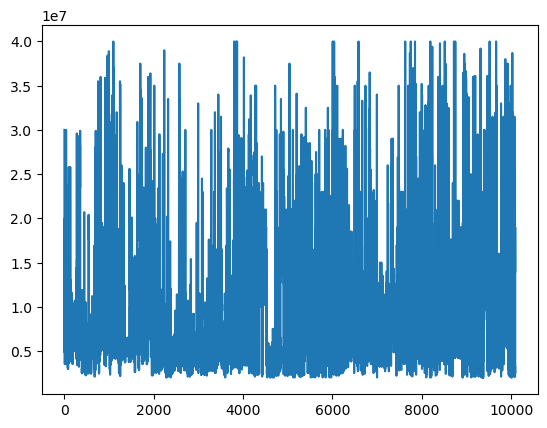

<Figure size 400x100 with 0 Axes>

In [15]:
    
plt.plot(k['Price'])
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)

plt.show()

In [16]:
data = k[['Area','No. of Bedrooms','Gasconnection','AC',"ClubHouse",'PowerBackup','Price','SwimmingPool',"Children'splayarea"]]
df=data
df.describe()

,Area,No. of Bedrooms,Gasconnection,AC,ClubHouse,PowerBackup,Price,SwimmingPool,Children'splayarea
count,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9.888000e+03,9888.000000,9888.000000
mean,1302.719357,2.433455,0.174656,0.059769,0.415756,0.649474,9.071220e+06,0.408677,0.510113
std,589.453264,0.735482,0.379692,0.237071,0.492877,0.477159,6.716065e+06,0.491614,0.499923
min,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+06,0.000000,0.000000
25%,924.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.457250e+06,0.000000,0.000000
50%,1200.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.800000e+06,0.000000,1.000000
75%,1589.250000,3.000000,0.000000,0.000000,1.000000,1.000000,1.130000e+07,1.000000,1.000000
max,8500.000000,8.000000,1.000000,1.000000,1.000000,1.000000,4.000000e+07,1.000000,1.000000


In [17]:
for col in data:
    if(col != "Area" and col != "Price" ):
        print(col+" : ",df[col].unique())


No. of Bedrooms :  [4. 2. 3. 1. 5. 6. 8.]
Gasconnection :  [0. 1.]
AC :  [0. 1.]
ClubHouse :  [1. 0.]
PowerBackup :  [1. 0.]
SwimmingPool :  [1. 0.]
Children'splayarea :  [1. 0.]


In [18]:
def normalize(j,i):
    df[j] = (df[i]) / (df[i].max())
    return df[i].max(),df[i].min()

In [19]:
pmax,pmin = normalize("sprice","Price")

amax,amin = normalize("sarea","Area")

bmax,bmin = normalize("sroom","No. of Bedrooms")

C:\Users\Jay Pandya\AppData\Local\Temp\ipykernel_15472\2487004772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = (df[i]) / (df[i].max())
C:\Users\Jay Pandya\AppData\Local\Temp\ipykernel_15472\2487004772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[j] = (df[i]) / (df[i].max())
C:\Users\Jay Pandya\AppData\Local\Temp\ipykernel_15472\2487004772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [26]:
df = df[ (df['sprice'] <= 0.29) ]
df.shape

(7541, 12)

In [27]:
df.describe()

,Area,No. of Bedrooms,Gasconnection,AC,ClubHouse,PowerBackup,Price,SwimmingPool,Children'splayarea,sprice,sarea,sroom
count,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7.541000e+03,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000
mean,1114.410688,2.251823,0.099987,0.034743,0.366397,0.603766,5.988996e+06,0.382045,0.456040,0.149725,0.131107,0.281478
std,375.404224,0.658427,0.300002,0.183141,0.481852,0.489147,2.476182e+06,0.485920,0.498097,0.061905,0.044165,0.082303
min,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+06,0.000000,0.000000,0.050000,0.023529,0.125000
25%,850.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+06,0.000000,0.000000,0.100000,0.100000,0.250000
50%,1100.000000,2.000000,0.000000,0.000000,0.000000,1.000000,5.500000e+06,0.000000,0.000000,0.137500,0.129412,0.250000
75%,1350.000000,3.000000,0.000000,0.000000,1.000000,1.000000,7.888000e+06,1.000000,1.000000,0.197200,0.158824,0.375000
max,3000.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.160000e+07,1.000000,1.000000,0.290000,0.352941,0.625000


In [28]:
inputs = ['sarea','sroom','PowerBackup','Gasconnection',"AC",'ClubHouse','SwimmingPool',"Children'splayarea"] # 
x = torch.tensor(df[inputs].values, dtype=torch.float, device=device )

output=['sprice']
y = torch.tensor(df[output].values, dtype=torch.float, device=device )

In [29]:
from torch.nn.modules.activation import ReLU


model = nn.Sequential(
    
        nn.Linear(8,300),
        nn.ReLU(),
        nn.Linear(300,1),
    )

#model = torch.load("C:/Users/Jay Pandya/model017")

model.to(device)

Sequential(
  (0): Linear(in_features=8, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opm

criterion = torch.nn.MSELoss()

optimizer = opm.SGD(model.parameters(), lr=0.007)
#optimizer = opm.Adadelta(model.parameters(), lr=0.01, rho=0.8, eps=1e-07, weight_decay=0)
#optimizer = opm.RMSprop(model.parameters(), lr=0.005, alpha=0.9, eps=1e-07)

for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):
        
        #single foreward pass
        ypred = model(x[i])
        
        # mesure loss
        loss = criterion(ypred, y[i])
        totalLoss += loss.item()
        
        #update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #print("loss :",totalLoss)
    print(f"{epoch+1} Total loss :",totalLoss)
    
sm=[]
for i in range(len(x)):
    k = model(x[i]) 
    a=k.tolist()
    if(y[i].item() != 0):
        prt=((a[0]-y[i].item())/y[i].item())
        sm.append(abs(prt))

print("ERROR % =",sum(sm)*100/len(sm))

1 Total loss : 13.220064158967151
2 Total loss : 10.326900939379634
3 Total loss : 9.6280546511794
4 Total loss : 9.171265253446276


In [ ]:
#torch.save(model,"model066")

In [86]:
# Plot predictions vs. true values
@torch.no_grad() 
def graphPredictions(model, x, y , minValue, maxValue):
    
    model.eval()                               # Set the model to inference mode
    
    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels
    
    x.to(device)
    y.to(device)
    model.to(device)
    
    for i in range(len(x)):
        
        # Single forward pass
        pred = model(x[i])                               

        # Un-normalize our prediction
        #pred = pred*pmax
        act = y[i]  #*pmax
        
        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
    plt.plot([minValue,maxValue], [minValue,maxValue]) 
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)
 
    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

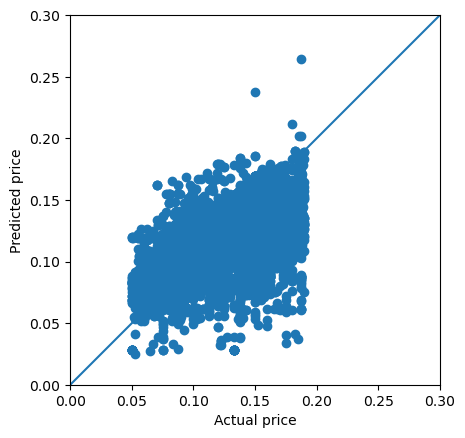

<Figure size 400x100 with 0 Axes>

In [88]:
graphPredictions(model, x, y,0,0.3)
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)

plt.show()

In [ ]:
q=0
while(q!=-1):
    q=int(input("Enter index to evaluate :"))
    k = model(x[q]) 
    a=k.tolist()
    a=a[0]*pmax
    b=y[i].item()*pmax
    print("Predicted =",a,"   Actual =",b)
    print("difference = ", a-b)
    print("% error =",(abs(b-a)/b)*100,"%")
    print()